<a href="https://colab.research.google.com/github/aliciawill/python-data/blob/master/%EA%B5%AC%EB%A7%A4%EC%98%88%EC%B8%A1_%EC%87%BC%ED%95%91%EB%AA%B0%EC%8B%9C%EA%B0%84%EB%8C%80%EB%B3%84%EA%B5%AC%EB%A7%A4_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import catboost as cat

In [ ]:
#!pip install catboost

In [ ]:
df = pd.read_csv('/content/shop-8.csv', encoding='utf-8')
df.head()

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,201905,1,평일,목,B.06-10시,F,A.2O대,291,NaN,NaN,NaN
1,202005,1,평일,월,D.14-18시,M,C.4O대,"6,225",NaN,NaN,NaN
2,201905,1,휴일,일,F.22-02시,M,B.3O대,51,NaN,"1, 1, 1, 1",1.0
3,202105,2,휴일,일,D.14-18시,F,C.4O대,"3,564",NaN,02월 02일,2.0
4,202005,1,평일,월,C.10-14시,F,D.5O대,"1,101",NaN,3,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRI_YM       19997 non-null  int64  
 1   TAG          19997 non-null  int64  
 2   평일휴일         19997 non-null  object 
 3   요일           19997 non-null  object 
 4   시간대          19997 non-null  object 
 5   성별           19997 non-null  object 
 6   연령대          19997 non-null  object 
 7    건수합계        19997 non-null  object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   4 non-null      object 
 10  Unnamed: 10  4 non-null      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.7+ MB


In [ ]:
df['TAG']

0        1
1        1
2        1
3        2
4        1
        ..
19992    2
19993    1
19994    2
19995    1
19996    1
Name: TAG, Length: 19997, dtype: int64

In [ ]:
encoder = LabelEncoder()
df['TAG'] = encoder.fit_transform(df['TAG'])
df['평일휴일'] = encoder.fit_transform(df['평일휴일'])
df['요일'] = encoder.fit_transform(df['요일'])
df['시간대'] = encoder.fit_transform(df['시간대'])
df['성별'] = encoder.fit_transform(df['성별'])
df['연령대'] = encoder.fit_transform(df['연령대'])

In [ ]:
df.head()

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,201905,0,0,1,1,0,0,291,NaN,NaN,NaN
1,202005,0,0,3,3,1,2,"6,225",NaN,NaN,NaN
2,201905,0,1,4,5,1,1,51,NaN,"1, 1, 1, 1",1.0
3,202105,1,1,4,3,0,2,"3,564",NaN,02월 02일,2.0
4,202005,0,0,3,2,0,3,"1,101",NaN,3,3.0


In [ ]:
df.columns

Index(['CRI_YM', 'TAG', '평일휴일', '요일', '시간대', '성별', '연령대', ' 건수합계 ',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['평일휴일', '요일', '시간대', '성별', '연령대',' 건수합계 ']],
    df['TAG'],
    test_size=0.2,
    random_state=42

)

In [ ]:
X_train.shape, X_test.shape

((15997, 6), (4000, 6))

In [ ]:
y_train.shape, y_test.shape

((15997,), (4000,))

In [ ]:
y_train[:10]

5748     1
1688     1
8174     2
10194    0
4667     1
5198     0
196      0
518      3
19140    0
17652    1
Name: TAG, dtype: int64

In [ ]:
pd.Series(''.join(' 12,345 '.strip().split(','))).astype('int64')

0    12345
dtype: int64

In [ ]:
def minus_comma(x):
  return pd.Series(''.join(x.strip().split(','))).astype('int64')

In [ ]:
df[' 건수합계 '] = df[' 건수합계 '].apply(minus_comma)
df[' 건수합계 '][:1]

0    291
Name:  건수합계 , dtype: int64

In [ ]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 3,
    random_state = 100
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [ ]:
dt_predt = dt.predict(X_test)

In [ ]:
dt_acc = accuracy_score(y_test, dt_predt)
dt_acc

0.61075

In [ ]:
## 소프트보팅이 하드보팅보다 정확도가 높아서 많이 쓰임.

In [ ]:
## bagging
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=10
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [ ]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predt)
rf_acc

0.6125

In [ ]:
confusion_matrix(y_test, rf_predt)

array([[2401,    6,    0,    0],
       [ 922,   49,    0,    0],
       [ 324,    0,    0,    0],
       [ 290,    8,    0,    0]])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
gbc = GradientBoostingClassifier(
      random_state=42
).fit(X_train, y_train)

In [ ]:
xgb = XGBClassifier(
    random_state=42,
    tree_method='hist'
).fit(X_train, y_train)

In [ ]:
gbc_predicted = gbc.predict(X_test)
accuracy_score(y_test, gbc_predicted)

0.6185

In [ ]:
xgb_predicted = xgb.predict(X_test)
accuracy_score(y_test, xgb_predicted)

0.6215

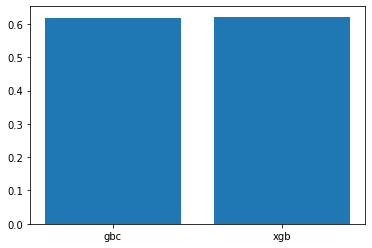

In [ ]:
x = np.arange(2)
plt.bar(x, height= [
                    accuracy_score(y_test, gbc_predicted),
                    accuracy_score(y_test, xgb_predicted)
            ])
plt.xticks(x, ['gbc', 'xgb']);

In [ ]:
confusion_matrix(y_test, xgb_predicted)

array([[2361,   41,    0,    5],
       [ 844,  125,    0,    2],
       [ 324,    0,    0,    0],
       [ 255,   43,    0,    0]])

In [ ]:
#catBoost는 target 라벨링 해주어야 함.
cb = cat.Pool(data = X_train, label= y_train)
cp = {
    'max_depth' : 10,
    'learning_rate' : 0.01,
    'n_estimators' : 100,
    'eval_metric' : 'Accuracy',
    'loss_function' : 'MultiClass'
}
cat_model = cat.train(pool=cb, params=cp)

0:	learn: 0.6194286	total: 43.3ms	remaining: 4.29s
1:	learn: 0.6164281	total: 53.6ms	remaining: 2.62s
2:	learn: 0.6198037	total: 68.2ms	remaining: 2.21s
3:	learn: 0.6221792	total: 100ms	remaining: 2.4s
4:	learn: 0.6225542	total: 139ms	remaining: 2.63s
5:	learn: 0.6229918	total: 173ms	remaining: 2.7s
6:	learn: 0.6219916	total: 183ms	remaining: 2.43s
7:	learn: 0.6218041	total: 212ms	remaining: 2.44s
8:	learn: 0.6214915	total: 249ms	remaining: 2.52s
9:	learn: 0.6218041	total: 282ms	remaining: 2.54s
10:	learn: 0.6213665	total: 289ms	remaining: 2.34s
11:	learn: 0.6213665	total: 320ms	remaining: 2.34s
12:	learn: 0.6219291	total: 353ms	remaining: 2.36s
13:	learn: 0.6220541	total: 382ms	remaining: 2.35s
14:	learn: 0.6219291	total: 415ms	remaining: 2.35s
15:	learn: 0.6216166	total: 426ms	remaining: 2.24s
16:	learn: 0.6213665	total: 461ms	remaining: 2.25s
17:	learn: 0.6214290	total: 496ms	remaining: 2.26s
18:	learn: 0.6216166	total: 529ms	remaining: 2.26s
19:	learn: 0.6217416	total: 560ms	remain

In [ ]:
cat_predt = np.argmax(cat_model.predict(X_test), axis=1)
accuracy_score(y_test, cat_predt)

0.61375

In [ ]:
df.to_csv('shopping-label-2.csv', encoding='utf-8')

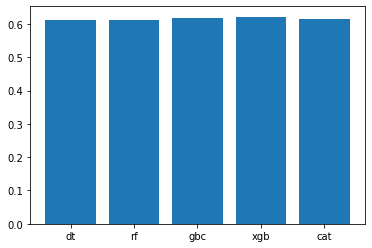

In [ ]:
x = np.arange(5)
plt.bar(x, height= [
                    accuracy_score(y_test, dt_predt),
                    accuracy_score(y_test, rf_predt),
                    accuracy_score(y_test, gbc_predicted),
                    accuracy_score(y_test, xgb_predicted),
                    accuracy_score(y_test, cat_predt)
            ])
plt.xticks(x, ['dt', 'rf', 'gbc', 'xgb', 'cat']);